<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/gapminder_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "gapminder.csv" 데이터 분석 연습

In [1]:
from google.colab import files
myfile = files.upload()

Saving gapminder.csv to gapminder.csv


In [6]:
import io
import pandas as pd
gapminder = pd.read_csv(io.BytesIO(myfile['gapminder.csv']))

In [7]:
gapminder

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns

(1) continent 대륙을 범주형으로 변환

In [26]:
gapminder['continent']= gapminder['continent'].astype("category")
display(gapminder)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


(2)년도별 대륙에 대한 GDP 평균 테이블로 재구성

In [29]:
table = pd.pivot_table(gapminder, values='gdpPercap', index=['year'],
                    columns=['continent'], aggfunc=np.mean)
table

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,1252.572466,4079.062552,5195.484004,5661.057435,10298.085650
1957,1385.236062,4616.043733,5787.732940,6963.012816,11598.522455
1962,1598.078825,4901.541870,5729.369625,8365.486814,12696.452430
1967,2050.363801,5668.253496,5971.173374,10143.823757,14495.021790
1972,2339.615674,6491.334139,8187.468699,12479.575246,16417.333380
1977,2585.938508,7352.007126,7791.314020,14283.979110,17283.957605
1982,2481.592960,7506.737088,7434.135157,15617.896551,18554.709840
1987,2282.668991,7793.400261,7608.226508,17214.310727,20448.040160
1992,2281.810333,8044.934406,8639.690248,17061.568084,20894.045885


(3) 년도별 대륙에 대한 평균 GDP 추세 그래프

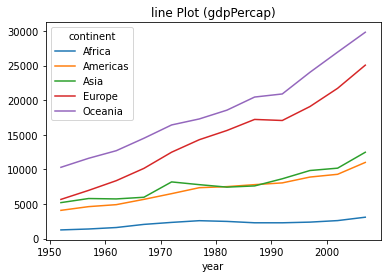

In [40]:
table.plot()
plt.title("line Plot (gdpPercap)")
plt.show()

(4) 년도별 대륙에 대한 평균 GDP 박스그래프로 분포 비교

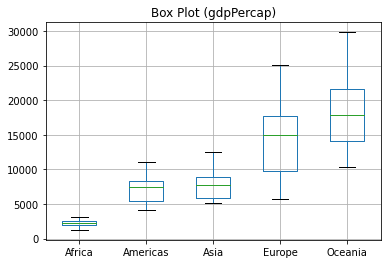

In [41]:
table.boxplot()
plt.title("Box Plot (gdpPercap)")
plt.show()

(5) 년도별 대륙에 대한 평균 GDP 확률밀도 그래프로 분포 비교

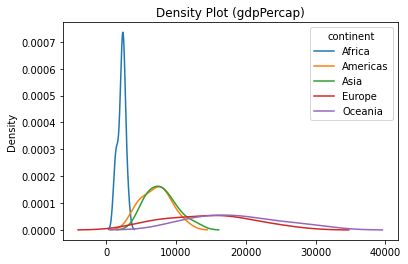

In [42]:
table.plot.density()
plt.title("Density Plot (gdpPercap)")
plt.show()

(6) 년도별 대륙에 대한 평균 GDP 막대그래프로 값 비교

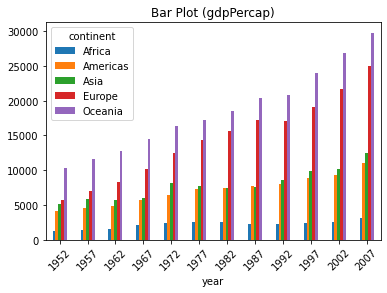

In [43]:
table.plot.bar(rot=45)
plt.title("Bar Plot (gdpPercap)")
plt.show()

(7) 평균기대수명 lifeExp 과 GDP( gdpPercap ) 관계 확인 (scatter)

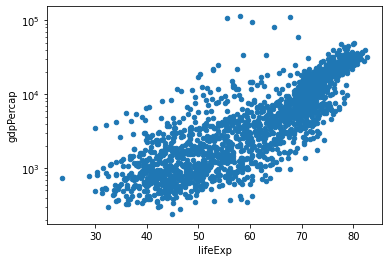

In [75]:
gapminder.plot.scatter(x="lifeExp", y="gdpPercap")
plt.yscale('log')

(8)2002도 데이터를 이용하여 평균기대수명 lifeExp 과 GDP( gdpPercap ) 관계 확인 matplotlib 의 scatter plot 이용 , x 축 lifeExp , y 축 gdpPercap , 크기 :pop, 색상 : continent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


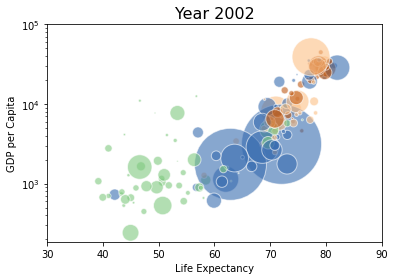

In [74]:
df_2002 = gapminder[gapminder['year']==2002]

plt.scatter(
    x = df_2002['lifeExp'], 
    y = df_2002['gdpPercap'], 
    s = df_2002['pop']/200000, 
    c = pd.Categorical(df_2002['continent']).codes, 
    alpha = 0.6, 
    cmap = "Accent",  
    edgecolors = "white",
    linewidths = 1)
plt.yscale('log')
plt.xlim([30, 90])
plt.ylim([0, 100000])
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title('Year 2002', fontsize=16)
plt.show()

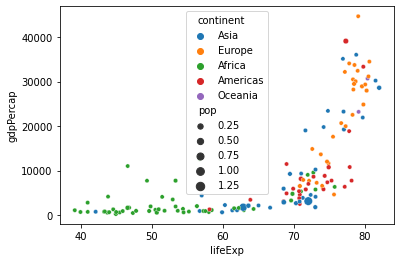

In [24]:
sns.scatterplot(
    data = gapminder[gapminder.year==2002],
    x = "lifeExp",
    y = "gdpPercap",
    hue = 'continent',
    size = 'pop'
)

(9)2002년도 데이터를 이용하여 평균기대수명 lifeExp 과 GDP( gdpPercap )의 상관계수와 Correlogram 확인

In [16]:
tmp = gapminder[gapminder.year==2002].drop(["year","pop"],axis=1).corr()
tmp

,lifeExp,gdpPercap
lifeExp,1.000000,0.681858
gdpPercap,0.681858,1.000000


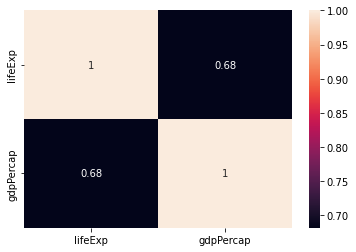

In [17]:
sns.heatmap(data = tmp, annot=True)